# prep data

In [132]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import pyreadstat
import numpy as np
from prince import MCA
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# !pip install pyreadstat

In [175]:
import pyreadstat
wave1_file = 'D:\RRR\Project Athena\Datathon2021\data\W1 Merged Data\Wave.1_Data\Merge\Wave1_20170906.sav'
wave2_file = 'D:\RRR\Project Athena\Datathon2021\data\W2 Merged Data/2w-3rd_release_all\merge\Wave2_20170724.sav'
# wave1_merge = 'D:\RRR\Project Athena\Datathon2021\data\W1 Merged Data\Wave.1_Data\Merge\Wave1_20170906.sav'
# wave2_merge = 'D:\RRR\Project Athena\Datathon2021\data\W2 Merged Data/2w-3rd_release_all\merge\Wave2_20170724.sav'

df1, meta1 = pyreadstat.read_sav(wave1_file)
df2, meta2 = pyreadstat.read_sav(wave2_file)
meta_dict1 = meta1.column_names_to_labels
meta_dict2 = meta2.column_names_to_labels

# df1.head(), df2.head()

(   country  idnumber  level3  yrsurvey  se002  se003  se003a  se004  se004a  \
 0      4.0       1.0     1.0    2002.0    1.0    5.0    38.0    NaN     1.0   
 1      4.0       2.0     1.0    2002.0    2.0   10.0    60.0    NaN     1.0   
 2      4.0       3.0     1.0    2002.0    2.0   10.0    69.0    NaN     1.0   
 3      4.0       4.0     1.0    2002.0    2.0    5.0    39.0    NaN     1.0   
 4      4.0       5.0     1.0    2002.0    1.0    7.0    48.0    NaN     1.0   
 
    se005  ...  ir010e  w_jp  w_hk  w_kr      w_cn  w_mo  w_ph  w_tw  w_th  \
 0    5.0  ...     NaN   NaN   NaN   NaN  0.621390   NaN   NaN   NaN   NaN   
 1    4.0  ...     NaN   NaN   NaN   NaN  0.446785   NaN   NaN   NaN   NaN   
 2    1.0  ...     NaN   NaN   NaN   NaN  0.583658   NaN   NaN   NaN   NaN   
 3    8.0  ...     NaN   NaN   NaN   NaN  0.490000   NaN   NaN   NaN   NaN   
 4    4.0  ...     NaN   NaN   NaN   NaN  0.396647   NaN   NaN   NaN   NaN   
 
    w_all  
 0   0.62  
 1   0.45  
 2   0.58  


## lookup func

In [59]:
# find str in dict, return all keys matching str
def find_str_in_dict(str, dict):
    key_seq = []
    for key, value in dict.items():
        # print(type(value))
        if value is not None:
            if str in value:
                key_seq = np.append(key_seq, key)
    
    print(key_seq)
    for key in key_seq:
        print(dict[key])
    
    return None
    
str_lookup = 'income'
find_str_in_dict(str_lookup, meta_dict1)
find_str_in_dict(str_lookup, meta_dict2)

annual income: national quintiles
['se009']
annual income: national quintiles
['se009']


In [24]:
# find string in df columns
df2.columns[df2.columns.str.contains('q111')]

Index(['q111'], dtype='object')

## drop nan-rich countries

In [196]:
#Drop columns that have no disambiguation or are not crucial for analysis

df1_trunc = df1.drop(['w_all', 'ir9_2', 'idnumber', 'IR1'], axis=1, inplace=False, errors='ignore')
df1_trunc_no_silen_countries = df1_trunc[(df1_trunc['country']!=5) & (df1_trunc['country']!=12)]
# df1_trunc[df1_trunc['q6'].isna()]['country'].hist()

# find and drop countries that caused all missing values in a column
count = 0
silen_countries = {}
cols_to_drop = []
for c in df1_trunc_no_silen_countries.columns:
    if df1_trunc_no_silen_countries[c].isnull().values.any():
        # print(c)
        unique_countries = list(df1_trunc_no_silen_countries[df1_trunc_no_silen_countries[c].isna()]['country'].unique())
        cols_to_drop += [c]
        if len(unique_countries) == 1:
            if unique_countries[0] not in silen_countries.keys():
                silen_countries[unique_countries[0]] = 1
            else:
                silen_countries[unique_countries[0]] += 1
        # print('\n')
    if not df1_trunc_no_silen_countries[c].isnull().values.any():
        count += 1
print(silen_countries) 
print(count)
df1_trunc_no_nan = df1_trunc_no_silen_countries.drop(cols_to_drop, axis=1, inplace=False)
# df1_trunc = df1_trunc.fillna(-1)

{8.0: 1, 4.0: 2}
4


In [198]:
#Drop columns that have no disambiguation or are not crucial for analysis

df2_trunc = df2.drop(['w_all', 'ir9_2', 'idnumber'], axis=1, inplace=False)
df2_trunc_no_mongol_no_camb = df2_trunc[(df2_trunc['country']!=5) & (df2_trunc['country']!=12)]
# df2_trunc[df2_trunc['q6'].isna()]['country'].hist()

# find and drop countries that caused all missing values in a column
count = 0
silen_countries = {}
cols_to_drop = []
for c in df2_trunc_no_mongol_no_camb.columns:
    if df2_trunc_no_mongol_no_camb[c].isnull().values.any():
        # print(c)
        unique_countries = list(df2_trunc_no_mongol_no_camb[df2_trunc_no_mongol_no_camb[c].isna()]['country'].unique())
        cols_to_drop += [c]
        if len(unique_countries) == 1:
            if unique_countries[0] not in silen_countries.keys():
                silen_countries[unique_countries[0]] = 1
            else:
                silen_countries[unique_countries[0]] += 1
        # print('\n')
    if not df2_trunc_no_mongol_no_camb[c].isnull().values.any():
        count += 1
print(silen_countries) 
print(count)
df2_trunc_no_nan = df2_trunc_no_mongol_no_camb.drop(cols_to_drop, axis=1, inplace=False)
# df2_trunc = df2_trunc.fillna(-1)

{4.0: 16, 2.0: 20, 3.0: 10, 10.0: 1, 8.0: 2}
86


# Multiple correspondence analysis (MCA)
https://towardsdatascience.com/5-must-know-dimensionality-reduction-techniques-via-prince-e6ffb27e55d1

## example code

In [65]:
tips = sns.load_dataset('tips')
tips.drop(['total_bill', 'tip'], axis =1, inplace = True)

In [110]:
tips

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [113]:
tips2 = tips[['size']].copy()
tips2['size2'] = tips2['size']**2
tips2

,size,size2
0,2,4
1,3,9
2,3,9
3,2,4
4,4,16
...,...,...
239,3,9
240,2,4
241,2,4
242,2,4


In [121]:
# cast float column to str in df
tips2['size'] = tips2['size'].astype(str)
tips2['size2'] = tips2['size2'].astype(str)
type(tips2['size2'][0])

str

In [67]:
# !pip install prince --user

  Using cached prince-0.7.1-py3-none-any.whl (21 kB)
  Using cached pandas-1.3.4-cp37-cp37m-win_amd64.whl (10.0 MB)


ERROR: otter-grader 2.2.6 requires google-auth-oauthlib, which is not installed.
ERROR: otter-grader 2.2.6 requires gspread, which is not installed.


In [68]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips)
tips_mca = mca.transform(tips)
tips_mca.head()

,0,1
0,-0.179709,-0.372317
1,-0.363840,-0.487036
2,-0.363840,-0.487036
3,-0.415941,-0.550888
4,-0.147590,-0.305220


In [122]:
from prince import MCA
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(tips2)
tips_mca = mca.transform(tips2)
tips_mca.head()

,0,1
0,-0.129099,-0.576453
1,-0.129099,0.151963
2,-0.129099,0.151963
3,-0.129099,-0.576453
4,-0.129099,1.746597


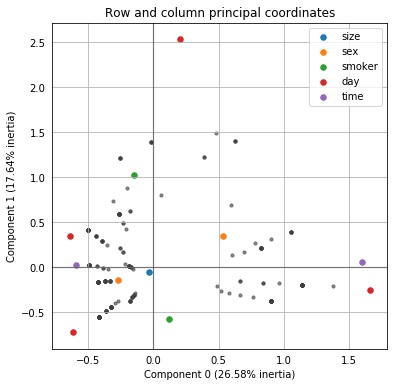

In [69]:
mca.plot_coordinates(X = tips)


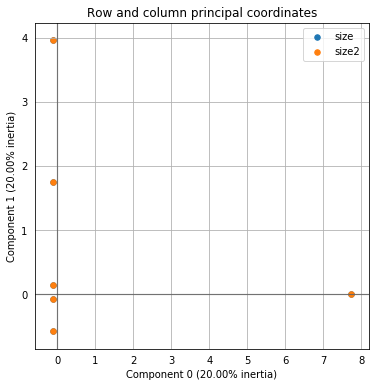

In [123]:
mca.plot_coordinates(X = tips2)


In [124]:
mca.explained_inertia_


[0.20000000000000018, 0.2]

## try wave 2

In [128]:
# income vs legitimacy
col_name = ['se9', 'q123', 'q111']
df_temp = df2[col_name].copy()
print(df_temp.size)
print(df2.se9.unique(), df2.q123.unique(), df2.q111.unique())

# drop nan
df_temp = df_temp.dropna()
print(df_temp.size)

def df_column_datatype_to_str(df, col_name):
    df[col_name] = df[col_name].astype(str)
    return df

df_temp = df_column_datatype_to_str(df_temp, col_name)
print(df_temp.se9.unique(), df_temp.q123.unique(), df_temp.q111.unique())

59394
['5.0' '1.0' '2.0' '3.0' '4.0' '98.0' '99.0' 'nan' '97.0'] ['3.0' '2.0' '4.0' '1.0' '8.0' '5.0' '9.0' '7.0' 'nan'] ['2.0' '1.0' '3.0' '8.0' '4.0' '9.0' '7.0' 'nan']
59394
['5.0' '1.0' '2.0' '3.0' '4.0' '98.0' '99.0' 'nan' '97.0'] ['3.0' '2.0' '4.0' '1.0' '8.0' '5.0' '9.0' '7.0' 'nan'] ['2.0' '1.0' '3.0' '8.0' '4.0' '9.0' '7.0' 'nan']


In [99]:
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df_temp)
t_mca = mca.transform(df_temp)
t_mca.sample(5)

,0,1
19259,-0.579332,0.705867
14032,-0.963988,0.087037
16116,-0.963988,0.087037
2728,-0.336627,-0.123570
11623,-0.074507,-0.182797


ZeroDivisionError: float division by zero

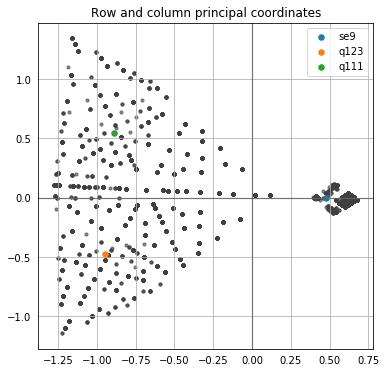

In [100]:
mca.plot_coordinates(X = df_temp)

In [109]:
# find column in df without nan
print(len(df2.columns[df2.isna().any()]), len(df2.columns))

# difference between 2 arrays
np.setdiff1d(df2.columns, df2.columns[df2.isna().any()])

236 252


array(['country', 'idnumber', 'q1', 'q10', 'q119', 'q12', 'q13', 'q15',
       'q2', 'q25', 'q3', 'q4', 'q5', 'q8', 'q9', 'w_all'], dtype=object)

## full wave 1

In [152]:
df1_trunc_no_nan_stringy = df1_trunc_no_nan.astype(str)
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df1_trunc_no_nan_stringy)
df1_trunc_mca = mca.transform(df1_trunc_no_nan_stringy)
df1_trunc_mca.head()

,0,1
0,-0.323549,-0.009327
1,-0.323549,-0.009327
2,-0.323549,-0.009327
3,-0.347001,0.071125
4,-0.323549,-0.009327


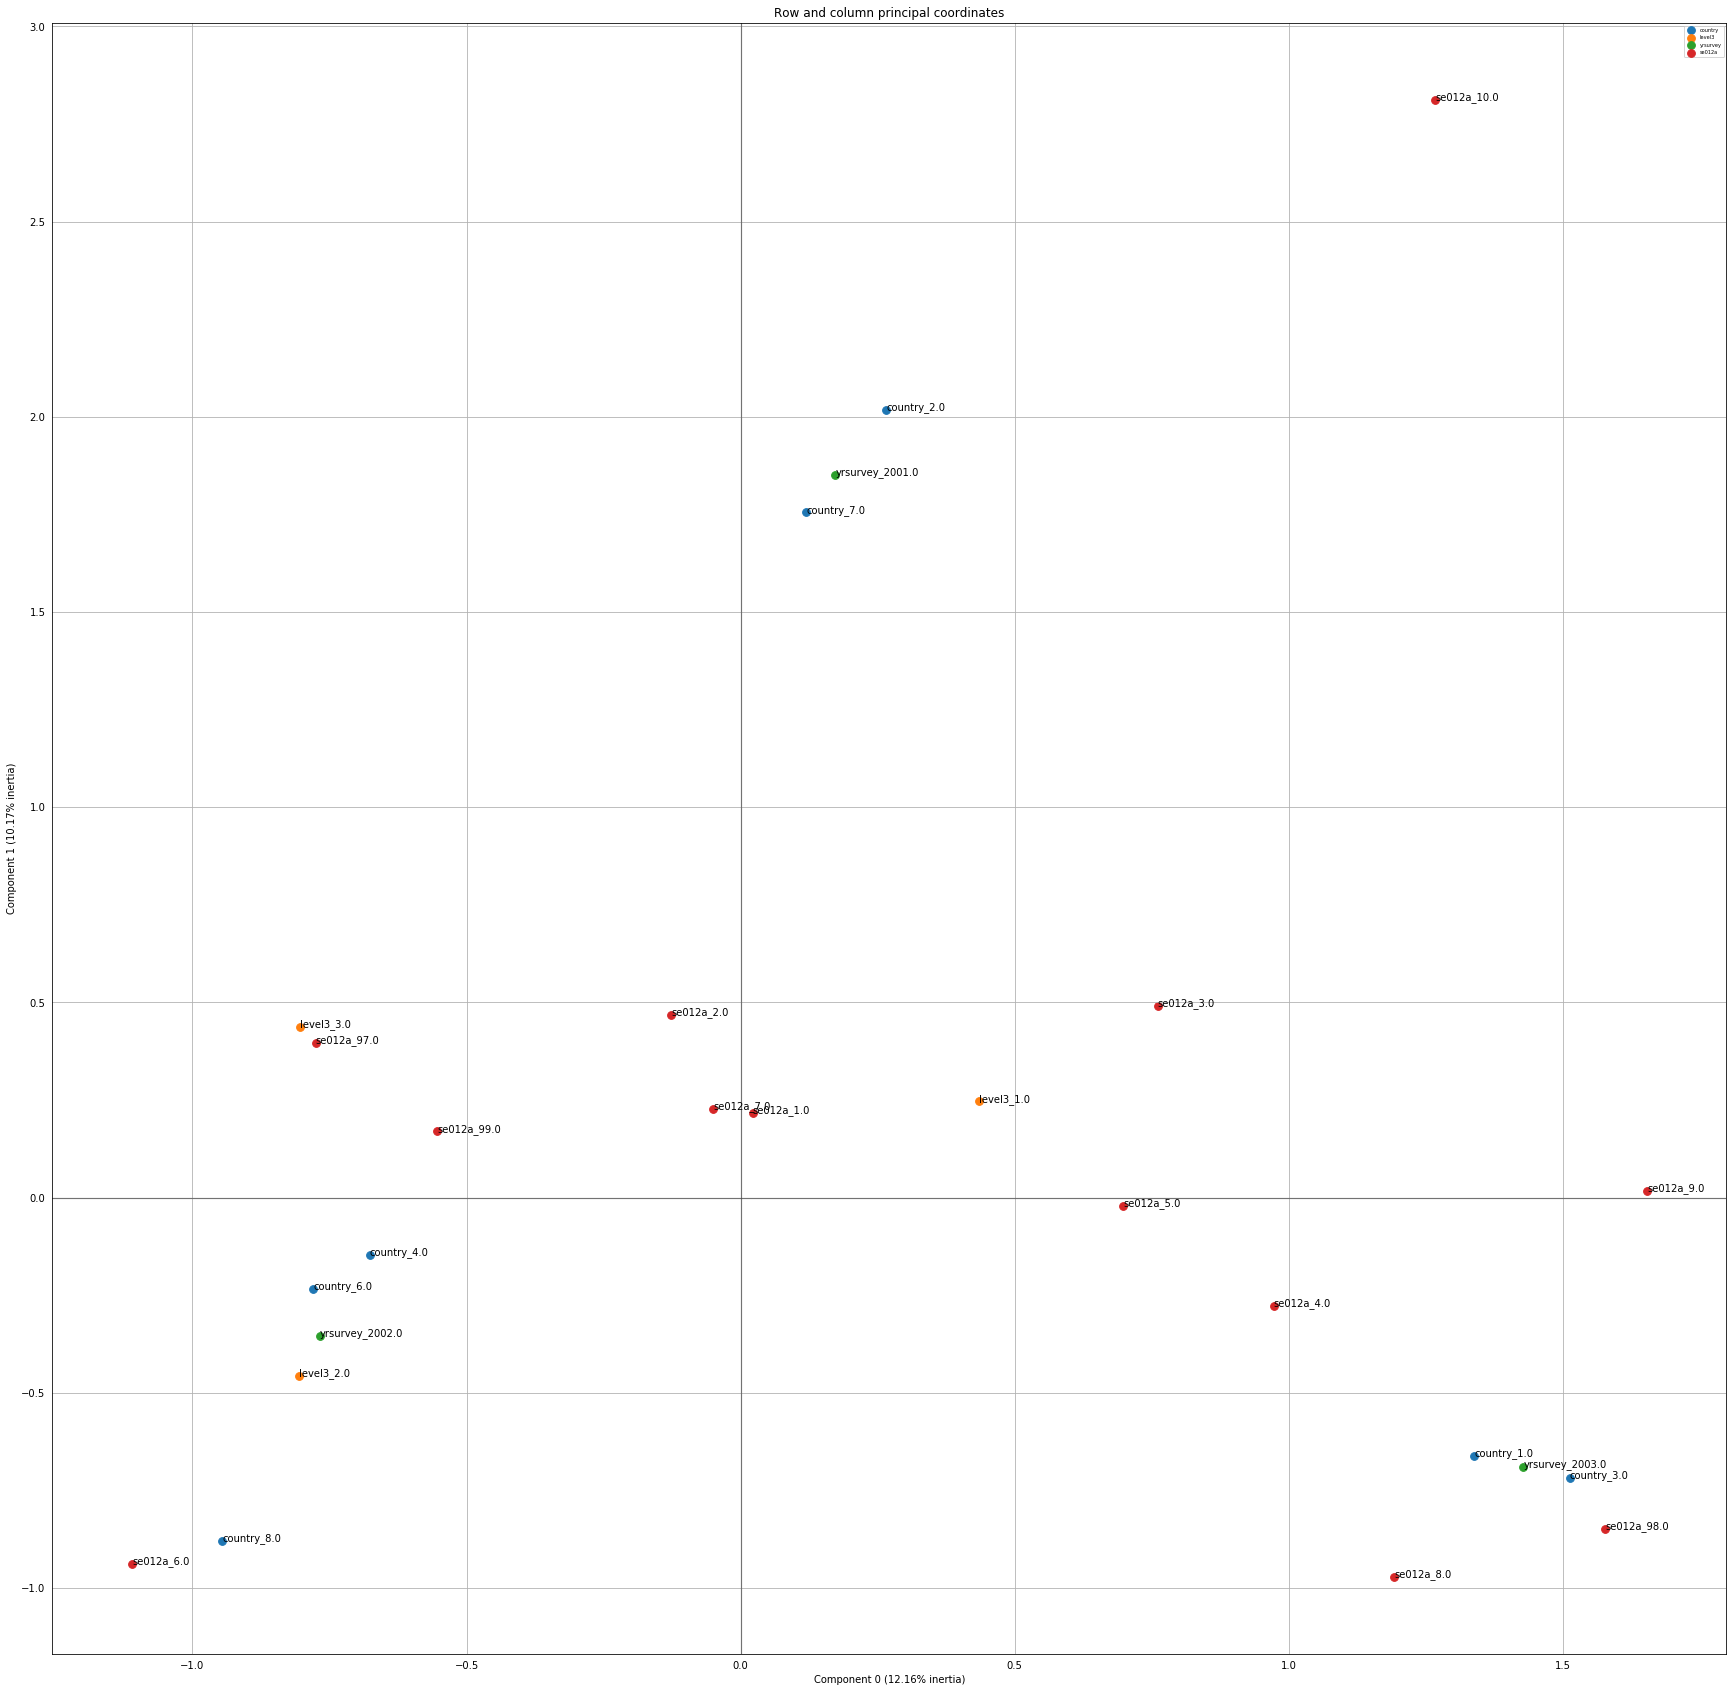

In [153]:
# fig = figure(num=None, figsize=(100, 100), dpi=150, facecolor='w', edgecolor='k')
# plt.rcParams['figure.figsize'] = (100, 100)
# plt.rcParams['figure.dpi'] = 400
ax = mca.plot_coordinates(X=df1_trunc_no_nan_stringy,
    ax=None,
    figsize=(30, 30),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=60,
    show_column_labels=True)
plt.legend(prop={'size': 5})
plt.savefig("MCA_wave1.pdf", format='pdf', bbox_inches='tight')

## full wave 2

In [155]:
df2_trunc_no_nan_stringy = df2_trunc_no_nan.astype(str)
mca = MCA(n_components = 2, n_iter = 3, random_state = 101)
mca.fit(df2_trunc_no_nan_stringy)
df2_trunc_mca = mca.transform(df2_trunc_no_nan_stringy)
df2_trunc_mca.head()

,0,1
0,-0.489131,0.388370
1,-0.332164,0.167274
2,-0.379590,0.148985
3,-0.336874,-0.104851
4,-0.497845,0.493330


In [163]:
df2_trunc_no_nan_stringy['q2']


0        1.0
1        4.0
2        4.0
3        3.0
4        4.0
        ... 
19793    4.0
19794    4.0
19795    5.0
19796    4.0
19797    2.0
Name: q2, Length: 17587, dtype: object

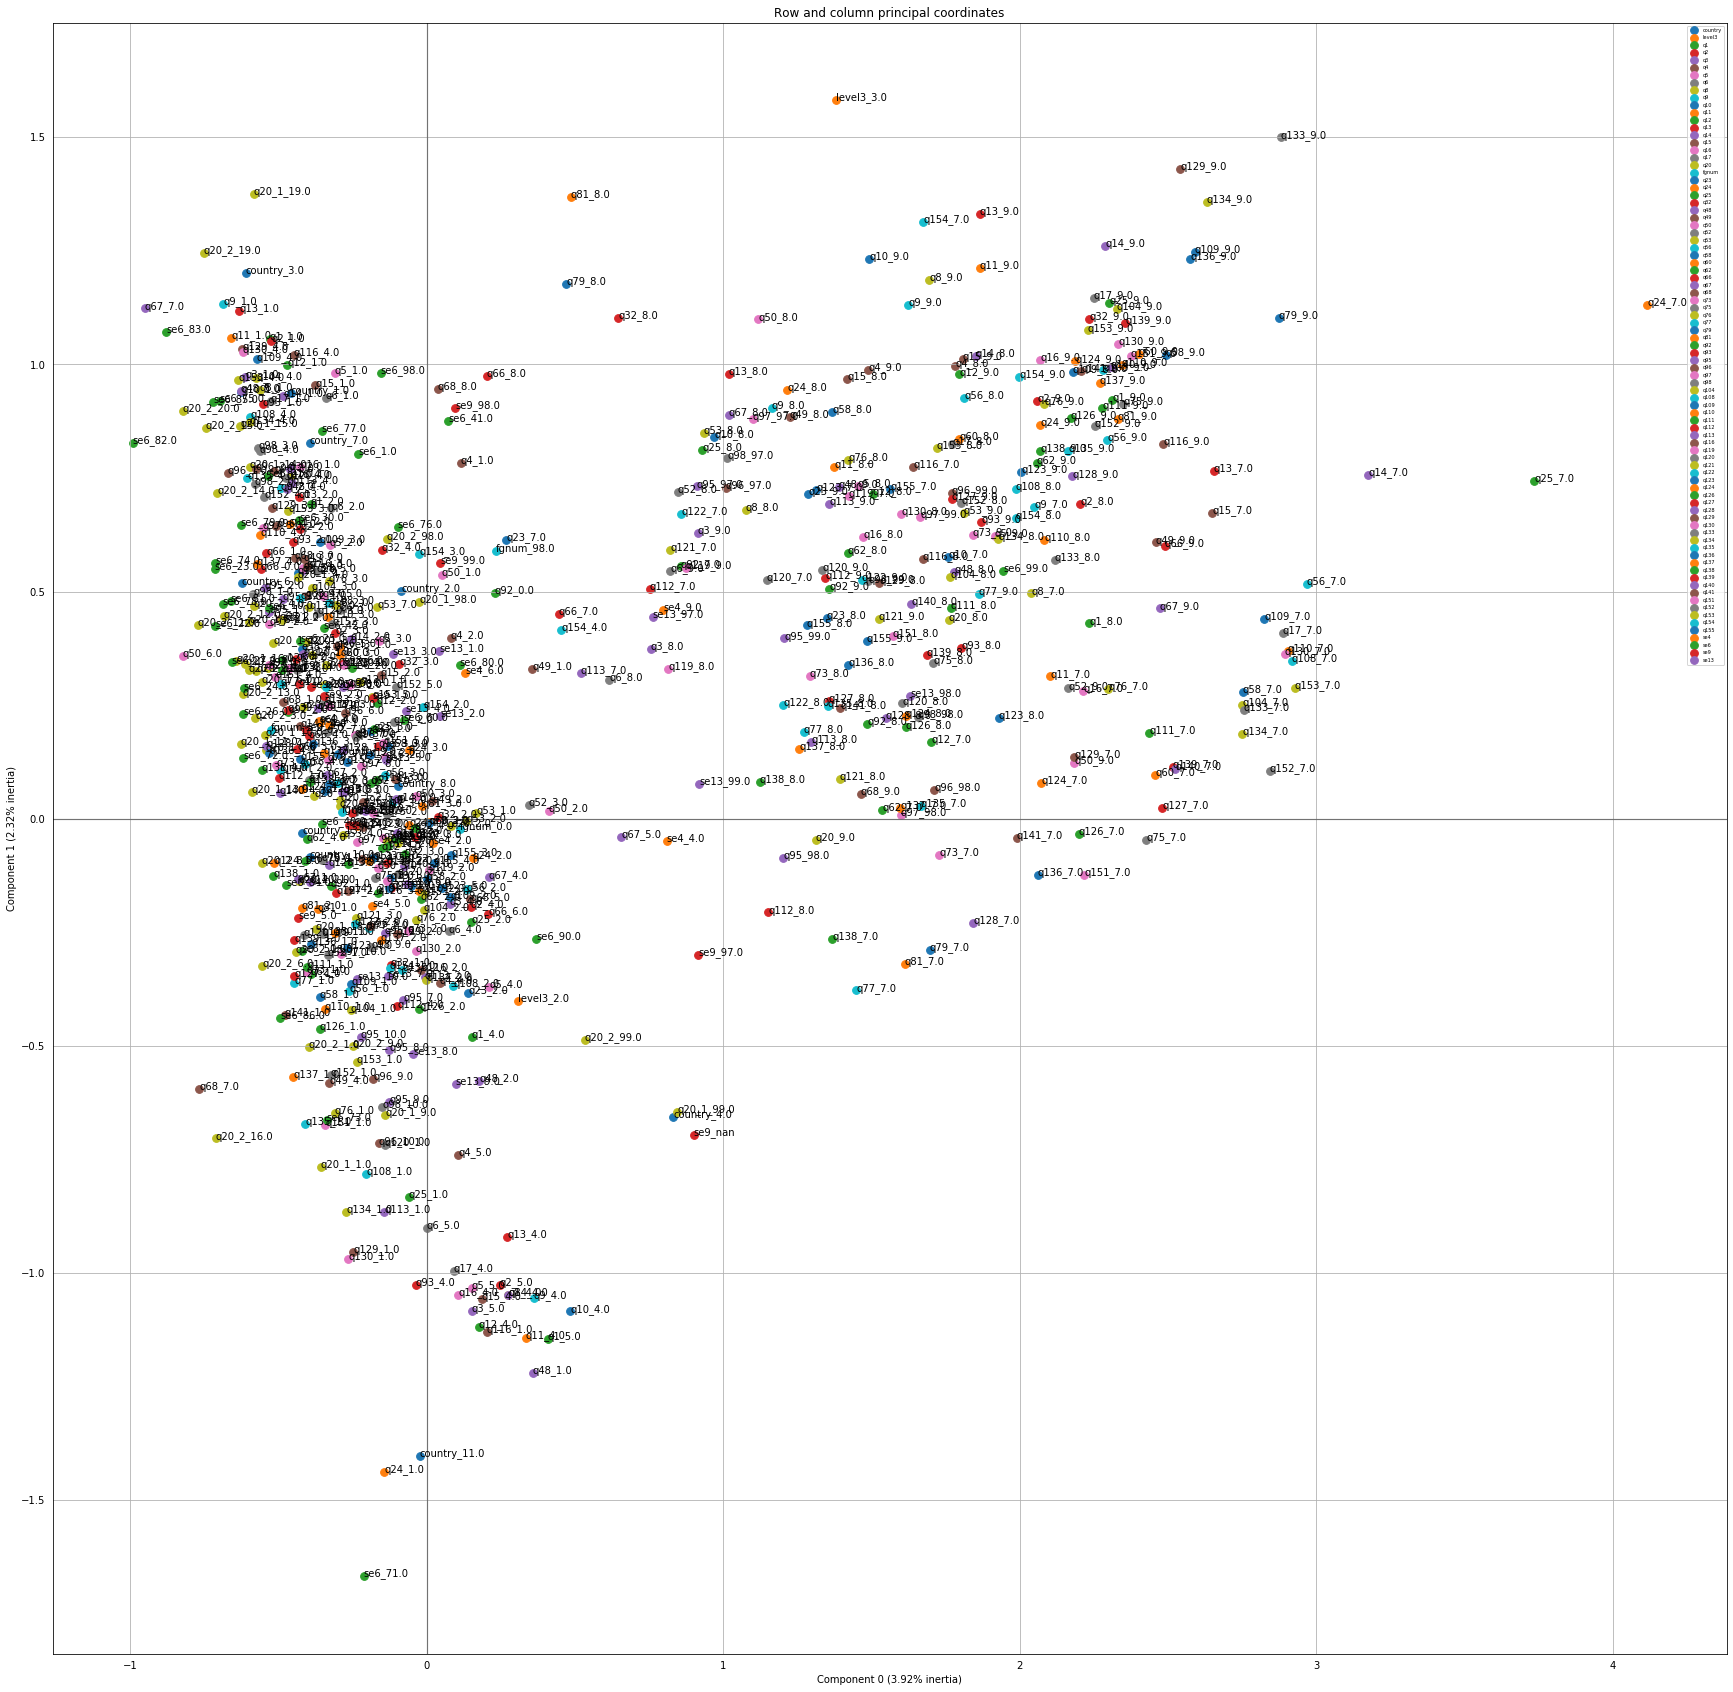

In [156]:
# fig = figure(num=None, figsize=(100, 100), dpi=150, facecolor='w', edgecolor='k')
# plt.rcParams['figure.figsize'] = (100, 100)
# plt.rcParams['figure.dpi'] = 400
ax = mca.plot_coordinates(X=df2_trunc_no_nan_stringy,
    ax=None,
    figsize=(30, 30),
    show_row_points=False,
    show_row_labels=False,
    show_column_points=True,
    column_points_size=60,
    show_column_labels=True)
plt.legend(prop={'size': 5})
# plt.savefig("MCA_wave2.pdf", format='pdf', bbox_inches='tight')


In [161]:
mca.plot_rows_columns()


AttributeError: 'MCA' object has no attribute 'plot_rows_columns'

In [159]:
dir(mca)

['U_',
 'V_',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_is_fitted',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 'benzecri',
 'check_input',
 'col_masses_',
 'column_coordinates',
 'copy',
 'eigenvalues_',
 'engine',
 'explained_inertia_',
 'fit',
 'fit_transform',
 'get_params',
 'n_components',
 'n_iter',
 'plot_coordinates',
 'random_state',
 'row_coordinates',
 'row_masses_',
 's_',
 'set_params',
 'total_inertia_',
 'transform']

# drop unhelpful answers

In [181]:
df2.sample(5)

,country,idnumber,level3,q1,q2,q3,q4,q5,q6,q7,...,irII13c,ir13d,ir13e,ir13f,ir13g,ir13h,ir13i,ir13k,ir14,w_all
12365,8.0,142.0,2.0,4.0,5.0,4.0,4.0,3.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,0.795028
10296,6.0,860.0,2.0,3.0,2.0,1.0,3.0,2.0,3.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.794869
17120,11.0,741.0,2.0,5.0,5.0,3.0,4.0,4.0,5.0,4.0,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,5.0,1.000000
1082,2.0,16.0,1.0,4.0,4.0,8.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
1684,2.0,618.0,1.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [174]:
meta_dict2.keys()
# df2.drop(['w_all', 'ir9_2', 'idnumber', 'IR1']

dict_keys(['country', 'idnumber', 'level3', 'q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'fgnum', 'q20_1', 'q20_2', 'q20_3', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'q29', 'q30', 'q31', 'q32', 'q33', 'q34', 'q35', 'q36', 'q37', 'q38', 'q39', 'q39a', 'q40', 'q41', 'q42', 'q43', 'q44', 'q45', 'q46', 'q47', 'q48', 'q49', 'q50', 'q51_1', 'q51_2', 'q51_3', 'q51_4', 'q51_5', 'q51_6', 'q51_7', 'q51_8', 'q51a', 'q52', 'q53', 'q54', 'q55', 'q56', 'q57', 'q58', 'q59', 'q60', 'q61', 'q62', 'q63', 'q64', 'q65', 'q66', 'q67', 'q68', 'q69', 'q70', 'q71', 'q72', 'q73', 'q74', 'q75', 'q76', 'q77', 'q78', 'q79', 'q80', 'q81', 'q82', 'q83', 'q84', 'q85', 'q86', 'q87', 'q88', 'q89', 'q90', 'q91_1', 'q91_2', 'q91_3', 'q92', 'q93', 'q94', 'q95', 'q96', 'q97', 'q98', 'q99', 'q100', 'q101', 'q102', 'q102a', 'q103', 'q104', 'q105', 'q106', 'q107', 'q108', 'q109', 'q110', 'q111', 'q112', 'q113', 'q114', 'q115', 'q116', 'q11

In [189]:
txt_name = 'D:\RRR\Project Athena\Datathon2021\data\W2 Merged Data/2w-3rd_release_all\merge/W2_codebook_20170315.txt'
# read txt file
with open(txt_name, 'rb') as f:
    contents = f.read()
    print(str(contents).lower())
# df_txt = pd.read_csv(txt_name, header=None) #sep='\t', 
# df_txt

b'******************************************************\r\n**                                                ****\r\n** asian barometer wave 2 (2005-2008) codebook    ****\r\n**         version 1                              ****\r\n**         2017.03.07                             ****\r\n****************************************************** \r\n\r\n   country \'country code\'\r\n\r\n     1 \'japan\r\n     2 \'hong kong\r\n     3 \'korea\r\n     4 \'china\'\r\n     5 \'mongolia\'\r\n     6 \'philippines\'\r\n     7 \'taiwan\'\r\n     8 \'thailand\'\r\n     9 \'indonesia\'\r\n    10 \'singapore\'\r\n    11 \'vietnam\'\r\n    12 \'cambodia\'\r\n    13 \'malaysia\'\r\n  \r\n   idnumber \'interview numbers\'\r\n\r\n   level3 \'urban-rural\'\r\n   \r\n\r\n*************************************************************************************\r\n                                economic evaluation\r\n*************************************************************************************\r\n\r\

In [195]:
# regex get first match of a string
import re
# pattern = r'\d{4}'
# re.search(pattern, str(contents).lower()).group()

for key in meta_dict2.keys():
    pattern = str(key)
    if re.search(pattern, str(contents).lower()) is not None:
        print(re.search(pattern, str(contents).lower()).group())


country
idnumber
level3
q1
q2
q3
q4
q5
q6
q7
q8
q9
q10
q11
q12
q13
q14
q15
q16
q17
q18
q19
q20
fgnum
q20_1
q20_2
q20_3
q23
q24
q25
q26
q27
q28
q29
q30
q31
q32
q33
q34
q35
q36
q37
q38
q39
q39a
q40
q41
q42
q43
q44
q45
q46
q47
q48
q49
q50
q51_1
q51_2
q51_3
q51_4
q51_5
q51_6
q51_7
q51_8
q51a
q52
q53
q54
q55
q56
q57
q58
q59
q60
q61
q62
q63
q64
q65
q66
q67
q68
q69
q70
q71
q72
q73
q74
q75
q76
q77
q78
q79
q80
q81
q82
q83
q84
q85
q86
q87
q88
q89
q90
q92
q93
q94
q95
q96
q97
q98
q99
q100
q102
q102a
q103
q104
q105
q106
q107
q108
q109
q110
q111
q112
q113
q114
q116
q117
q118
q119
q119_1
q119_2
q119_3
q120
q121
q122
q123
q124
q125
q126
q127
q128
q129
q130
q131
q132
q133
q134
q135
q136
q137
q138
q139
q140
q141
q142
q143
q144
q145
q146
q147
q148
q149
q150
q151
q152
q153
q154
q155
q156
q157
q158
q159
q160
q161
q162
q163
q164
q165
q166
se2
se4
se5
se5a
se6
se7
se7a
se8b
se9
se9a
se10a
se10b
se10c
se10d
se10e
se10f
se10g
se10h
se10i
se10j
se10k
se10l
se10m
se10n
se10o
se11
se12a
se13
ir2
ir2a
ir2b
ir3
ir3